# IBM HR Analytics Employee Attrition 

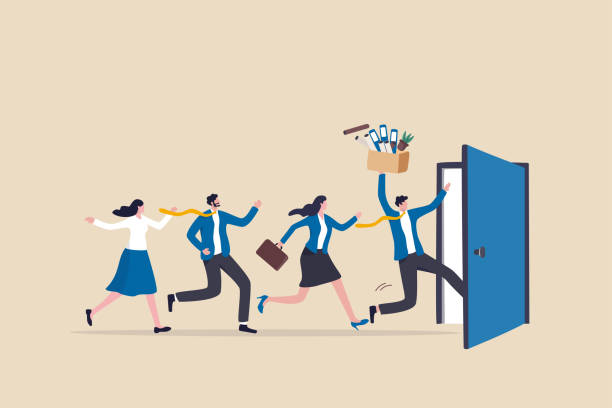

## `Importing Libraries`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.metrics  import f1_score, recall_score, precision_score, accuracy_score, classification_report, confusion_matrix

In [7]:
from sklearn.ensemble import RandomForestClassifier

## `Reading the dataset` 

In [8]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
data.shape

(1470, 35)

In [11]:
for col in data.columns:
    if data[col].dtypes=='O':
        print(f'{col} : {data[col].unique()}')
    else:
        print(f'{col} : {data[col].min()} - {data[col].max()}')

Age : 18 - 60
Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate : 102 - 1499
Department : ['Sales' 'Research & Development' 'Human Resources']
DistanceFromHome : 1 - 29
Education : 1 - 5
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EmployeeCount : 1 - 1
EmployeeNumber : 1 - 2068
EnvironmentSatisfaction : 1 - 4
Gender : ['Female' 'Male']
HourlyRate : 30 - 100
JobInvolvement : 1 - 4
JobLevel : 1 - 5
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
JobSatisfaction : 1 - 4
MaritalStatus : ['Single' 'Married' 'Divorced']
MonthlyIncome : 1009 - 19999
MonthlyRate : 2094 - 26999
NumCompaniesWorked : 0 - 9
Over18 : ['Y']
OverTime : ['Yes' 'No']
PercentSalaryHike : 11 - 25
PerformanceRating : 3 - 4
RelationshipSatisfaction : 1 - 4
Standa

In [12]:
data.drop(['Over18','EmployeeCount'], axis=1, inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [14]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

In [15]:
data.duplicated().sum()

0

In [16]:
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(exclude=['object']).columns

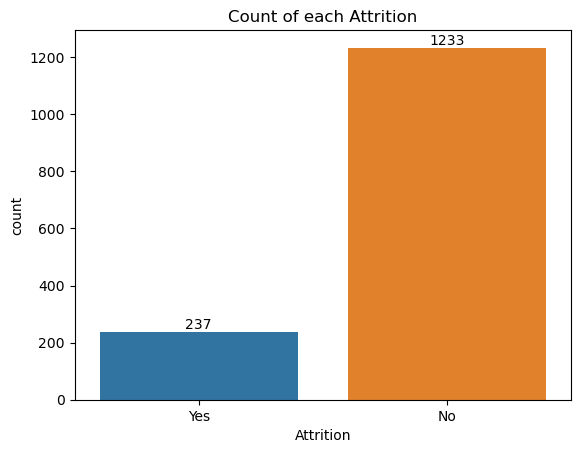

In [17]:
ax=sns.countplot(x=data['Attrition'])
for i in ax.containers:
    ax.bar_label(i)
plt.title('Count of each Attrition')
plt.show()

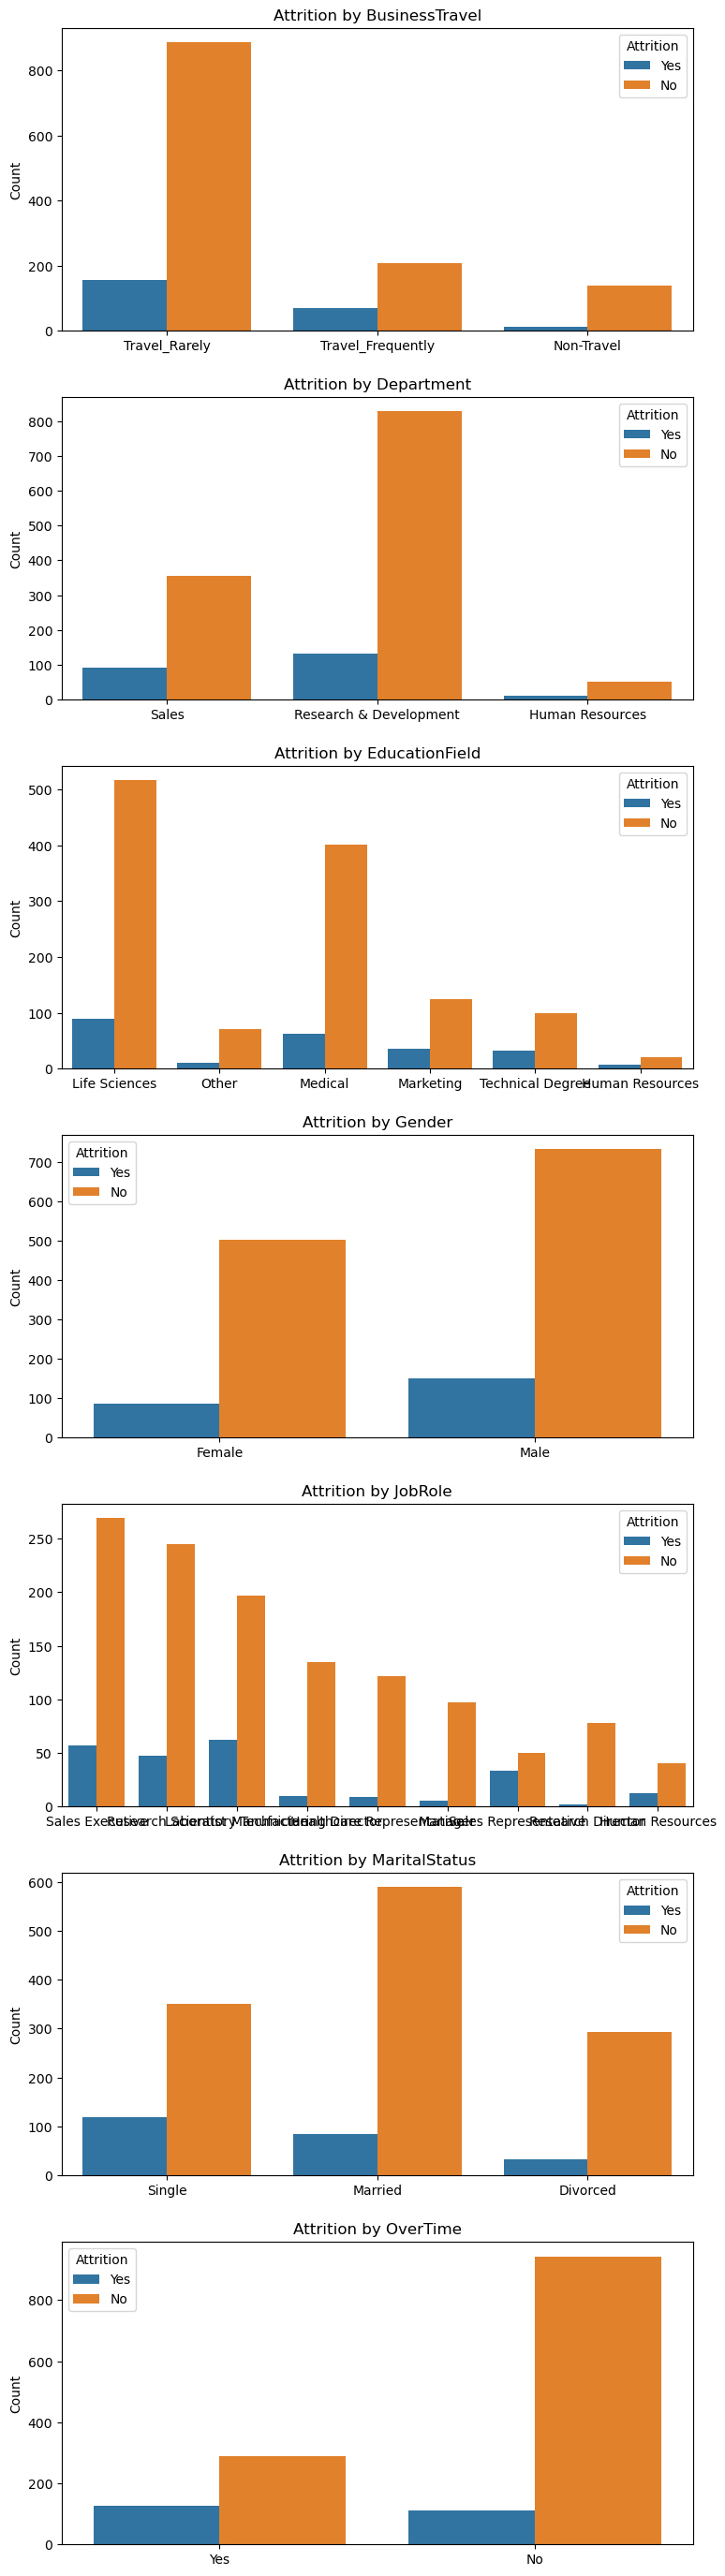

In [18]:
categorical_columns = categorical_columns[1:]
num_rows = len(categorical_columns)
fig, ax = plt.subplots(nrows=num_rows, ncols=1, figsize=(8, 4 * num_rows))
fig.tight_layout(pad=3.0)
for i, column_name in enumerate(categorical_columns):
    sns.countplot(x=column_name, hue='Attrition', data=data, ax=ax[i])
    ax[i].set_title(f'Attrition by {column_name}')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Count')
plt.show()

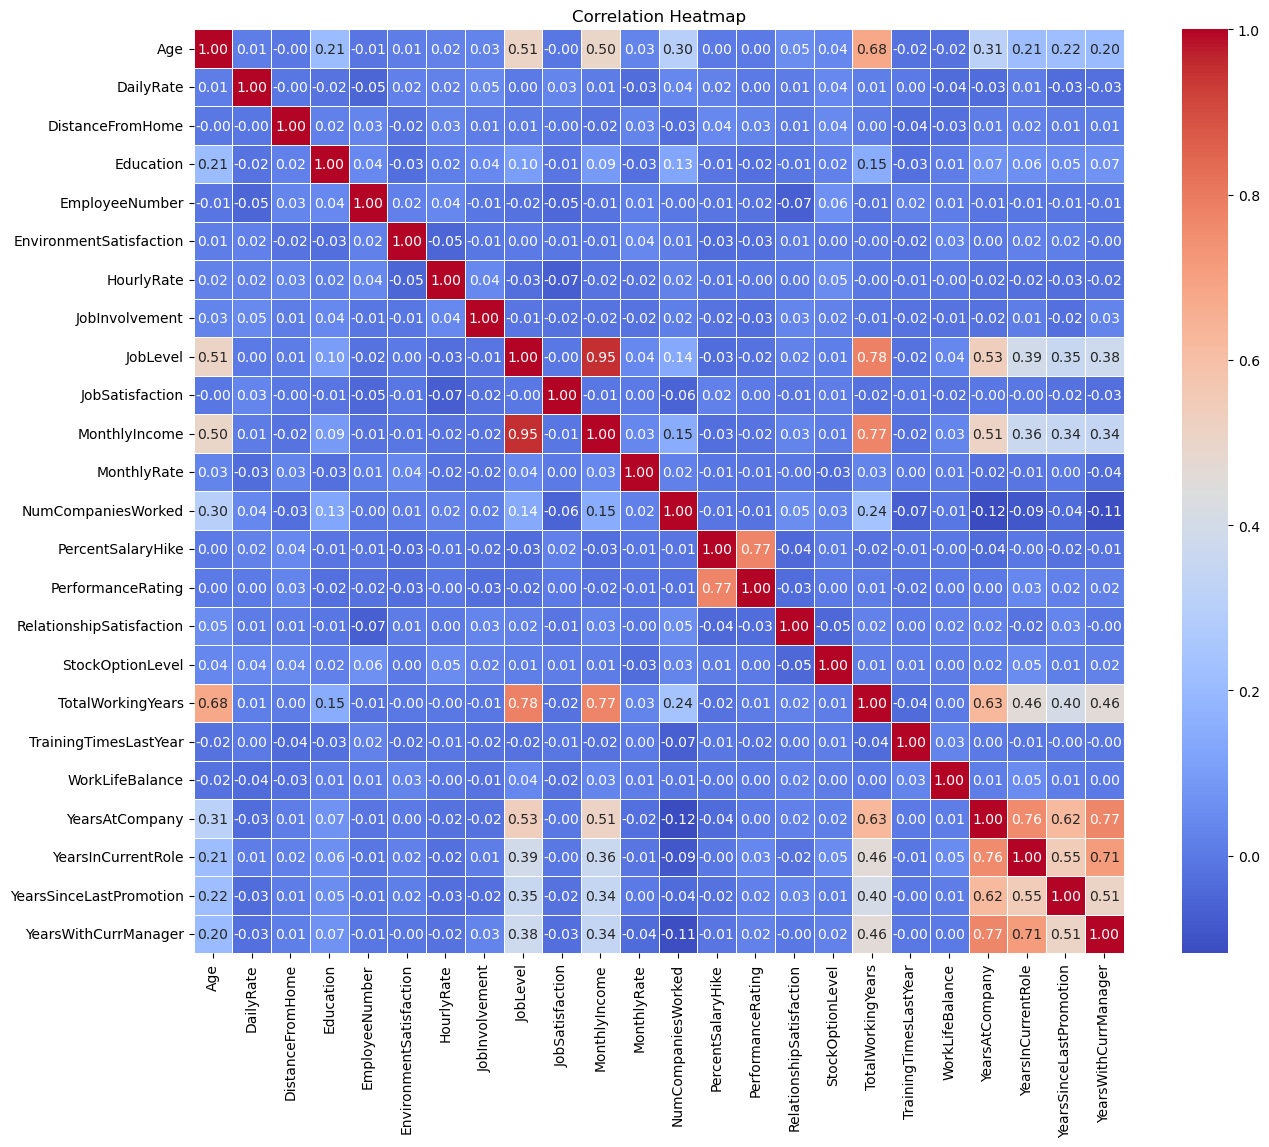

In [19]:
correlation_matrix = data.drop('StandardHours',axis=1).corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

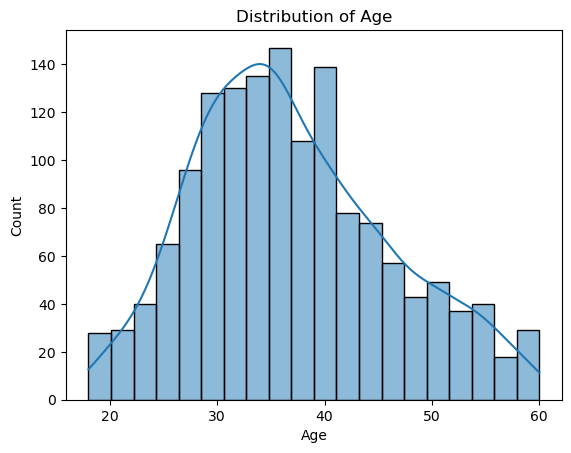

In [20]:
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

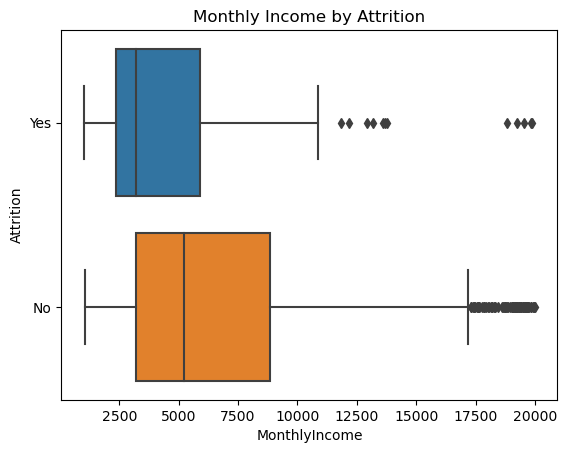

In [21]:
sns.boxplot(y='Attrition', x='MonthlyIncome', data=data)
plt.title('Monthly Income by Attrition')
plt.show()

<Axes: xlabel='JobSatisfaction', ylabel='JobRole'>

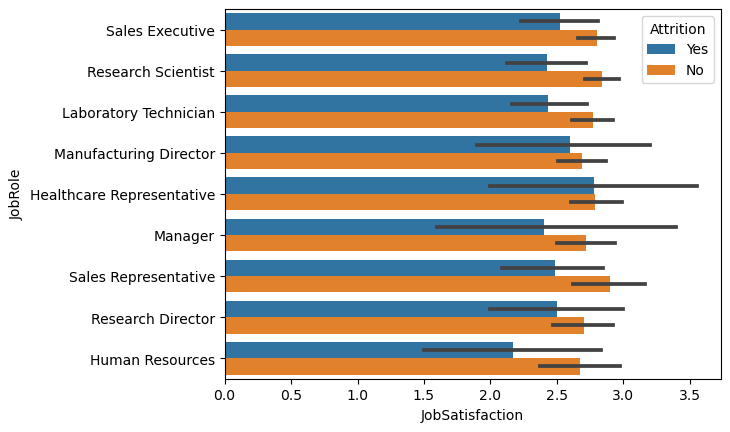

In [22]:
sns.barplot(y='JobRole', x='JobSatisfaction', hue='Attrition',data=data)

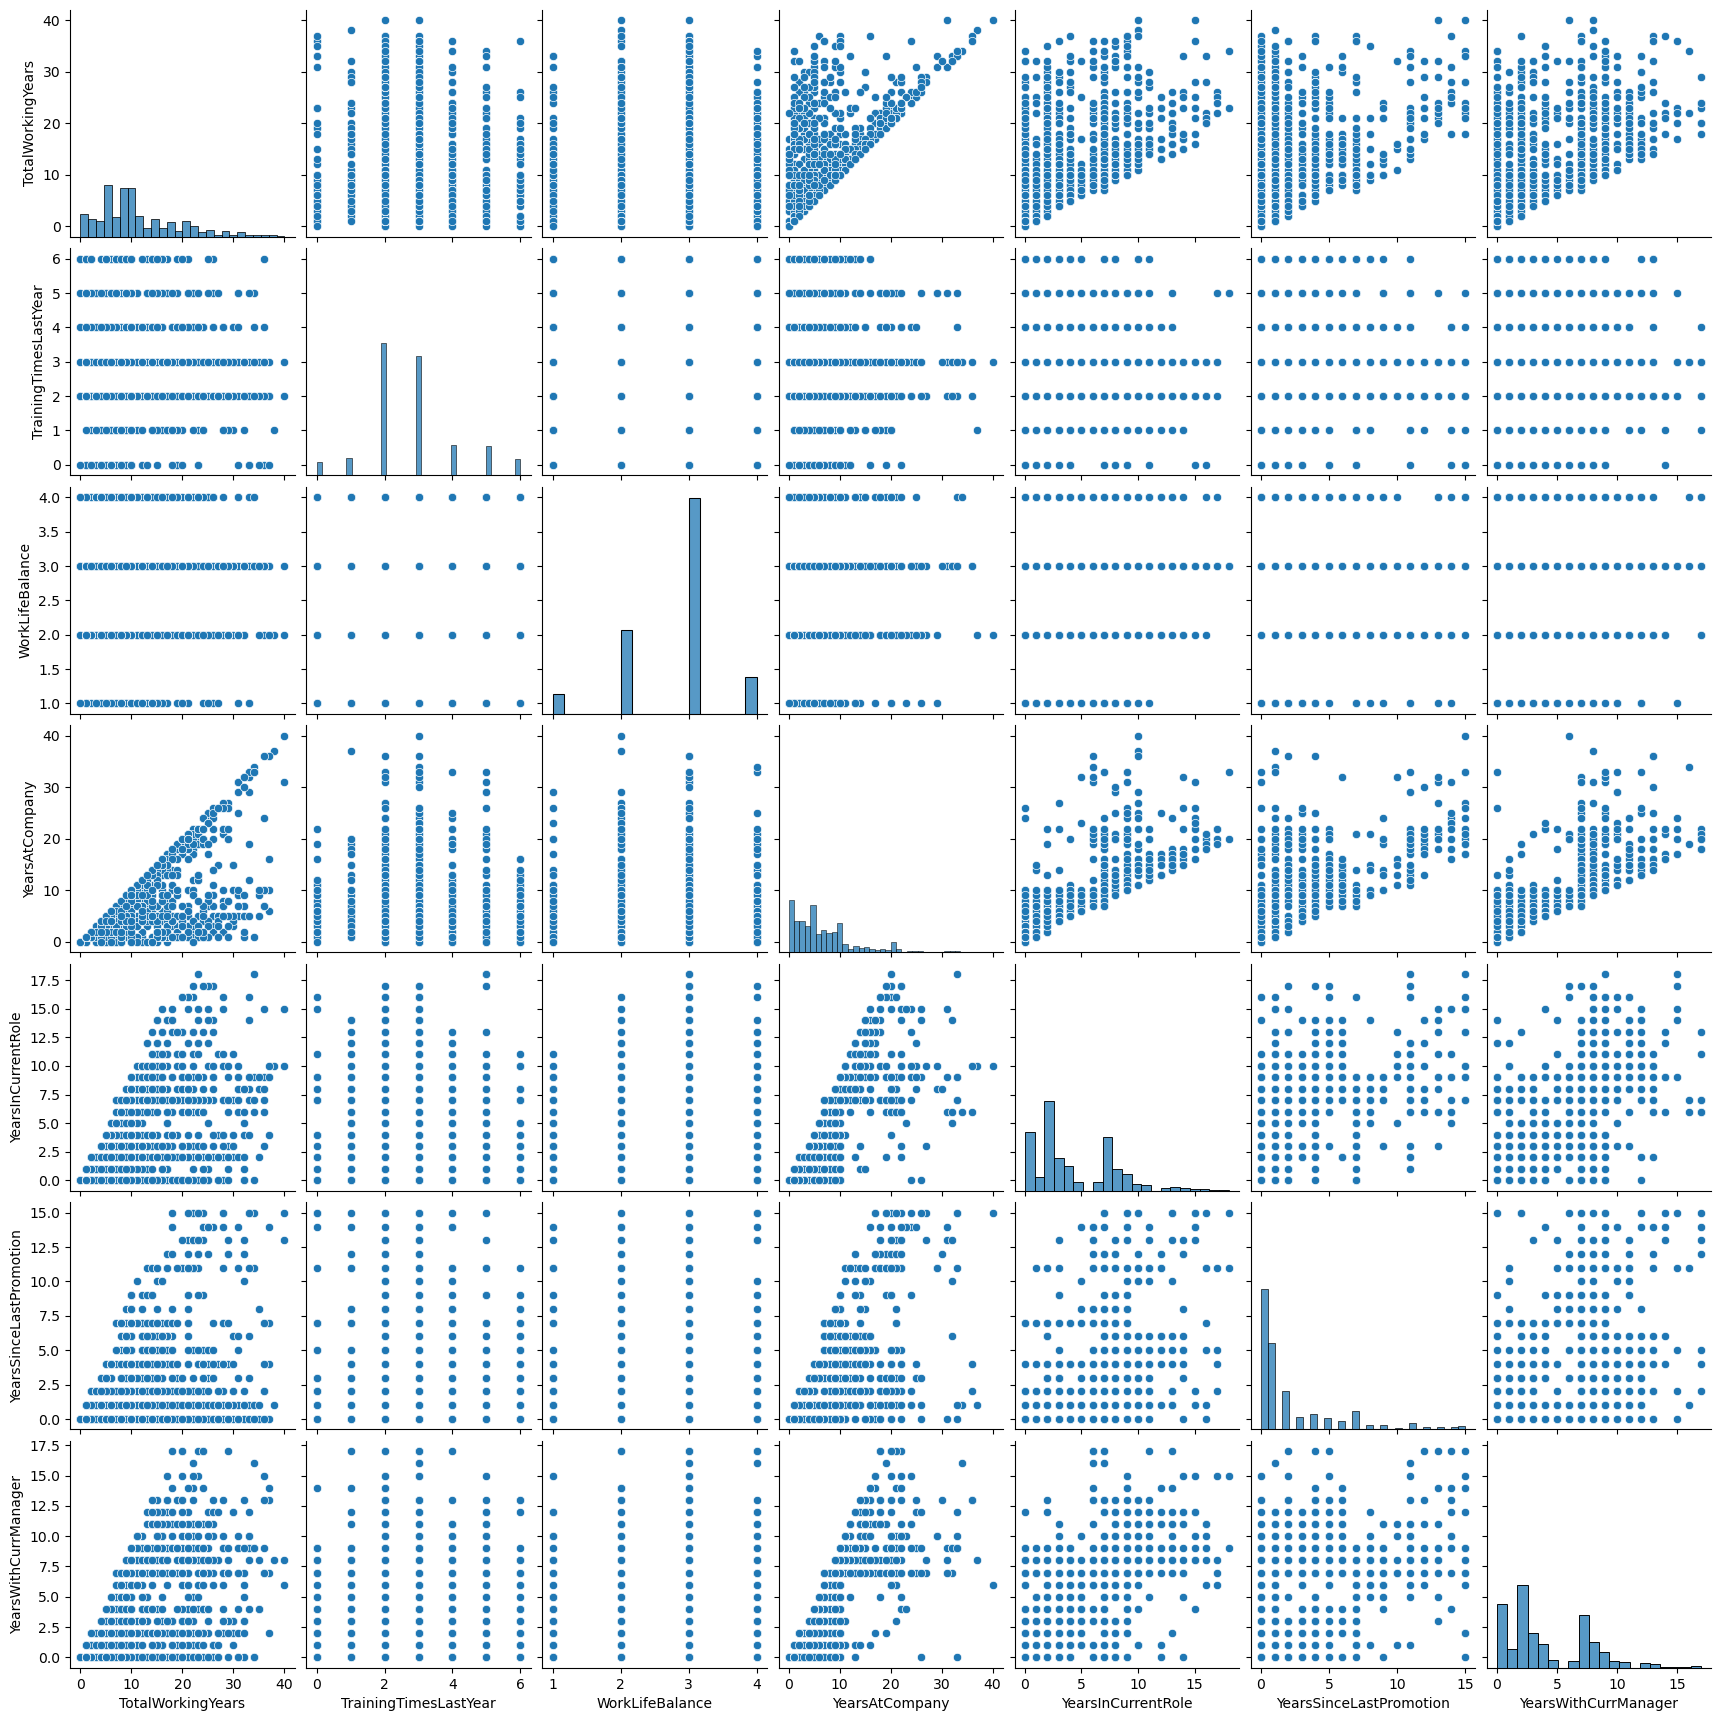

In [23]:
sns.pairplot(data=data[['TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']])

## `Data Preprocessing`

In [24]:
for col in data.columns:
    if data[col].dtypes=='O':
        print(f'{col} : {data[col].unique()}')

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
OverTime : ['Yes' 'No']


In [25]:
data.Attrition=[1 if val=='Yes' else 0 for val in data.Attrition]

In [26]:
data.Gender=[1 if val=='Male' else 0 for val in data.Gender]

In [27]:
data.OverTime=[1 if val=='Yes' else 0 for val in data.OverTime]

In [28]:
BusinessTravel_dummies=pd.get_dummies(data.BusinessTravel)
Department_dummies=pd.get_dummies(data.Department)
EducationField_dummies=pd.get_dummies(data.EducationField)
JobRole_dummies=pd.get_dummies(data.JobRole)
MaritalStatus_dummies=pd.get_dummies(data.MaritalStatus)

In [29]:
data=pd.concat([data,
               BusinessTravel_dummies.iloc[:,:2],
               Department_dummies.iloc[:,:2],
               EducationField_dummies.iloc[:,:5],
               JobRole_dummies.drop(columns='Human Resources'),
               MaritalStatus_dummies.iloc[:,:2]
               ],axis=1)

data.drop(['BusinessTravel','Department','EducationField','JobRole','MaritalStatus'],axis=1,inplace=True)
data

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,Healthcare Representative,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married
0,41,1,1102,1,2,1,2,0,94,3,...,0,0,0,0,0,0,1,0,0,0
1,49,0,279,8,1,2,3,1,61,2,...,0,0,0,0,0,1,0,0,0,1
2,37,1,1373,2,2,4,4,1,92,2,...,0,1,0,0,0,0,0,0,0,0
3,33,0,1392,3,4,5,4,0,56,3,...,0,0,0,0,0,1,0,0,0,1
4,27,0,591,2,1,7,1,1,40,3,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,2061,3,1,41,4,...,0,1,0,0,0,0,0,0,0,1
1466,39,0,613,6,1,2062,4,1,42,2,...,1,0,0,0,0,0,0,0,0,1
1467,27,0,155,4,3,2064,2,1,87,4,...,0,0,0,1,0,0,0,0,0,1
1468,49,0,1023,2,3,2065,4,1,63,2,...,0,0,0,0,0,0,1,0,0,1


## `Train Test Split`

In [30]:
X=data.drop('Attrition',axis=1)
y=data.Attrition

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=11,train_size=0.80,shuffle=True)

In [32]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((1176, 46), (294, 46), (1176,), (294,))

In [33]:
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,Healthcare Representative,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married
38,36,852,5,4,51,2,0,82,2,1,...,0,0,0,0,0,1,0,0,0,1
907,44,1099,5,3,1267,2,1,88,3,5,...,0,0,1,0,0,0,0,0,0,1
311,45,1249,7,3,425,1,1,97,3,3,...,0,1,0,0,0,0,0,0,1,0
77,45,193,6,4,101,4,1,52,3,3,...,0,0,0,0,1,0,0,0,0,1
287,38,688,23,4,393,4,1,82,3,2,...,1,0,0,0,0,0,0,0,1,0


In [34]:
y_train[:5]

38     0
907    0
311    0
77     0
287    0
Name: Attrition, dtype: int64

## `Scaling`

In [35]:
scaler = StandardScaler()

In [36]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
X_train

array([[-0.10626748,  0.12321901, -0.51540633, ..., -0.2515773 ,
        -0.53276899,  1.09271673],
       [ 0.76765248,  0.72676817, -0.51540633, ..., -0.2515773 ,
        -0.53276899,  1.09271673],
       [ 0.87689248,  1.093296  , -0.26755606, ..., -0.2515773 ,
         1.87698613, -0.91515026],
       ...,
       [-1.19866743,  0.71943761, -0.39148119, ..., -0.2515773 ,
        -0.53276899,  1.09271673],
       [-0.32474747, -0.78821353, -0.26755606, ..., -0.2515773 ,
        -0.53276899, -0.91515026],
       [-0.87094744, -0.49743478, -0.01970578, ..., -0.2515773 ,
        -0.53276899,  1.09271673]])

In [38]:
X_test

array([[-1.30790742, -0.27751808, -0.76325661, ..., -0.2515773 ,
        -0.53276899,  1.09271673],
       [-0.98018744,  0.87093578, -0.01970578, ..., -0.2515773 ,
        -0.53276899,  1.09271673],
       [-0.65246745,  0.42621535, -0.76325661, ..., -0.2515773 ,
         1.87698613, -0.91515026],
       ...,
       [ 0.11221251,  1.26922936, -1.01110688, ..., -0.2515773 ,
        -0.53276899,  1.09271673],
       [ 0.11221251, -1.17184599, -0.26755606, ..., -0.2515773 ,
         1.87698613, -0.91515026],
       [ 2.5154924 ,  1.70417572,  2.33487182, ..., -0.2515773 ,
        -0.53276899,  1.09271673]])

## `Model and Feature Importance`

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
max_accuracy = 0

for x in range(120):
    RF = RandomForestClassifier(random_state=x)
    RF.fit(X_train,y_train)
    y_pred = RF.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)

86.73
23


In [41]:
RF=RandomForestClassifier(criterion='entropy', random_state=best_x, n_estimators=19)

In [42]:
RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=19, random_state=23)

In [43]:
y_pred = RF.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       246
           1       0.69      0.19      0.30        48

    accuracy                           0.85       294
   macro avg       0.78      0.59      0.61       294
weighted avg       0.83      0.85      0.82       294



In [45]:
train_acc=RF.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9974489795918368
Testing Accuracy : 0.8537414965986394
F1 Score : 0.29508196721311475
Recall : 0.1875
Precision : 0.6923076923076923


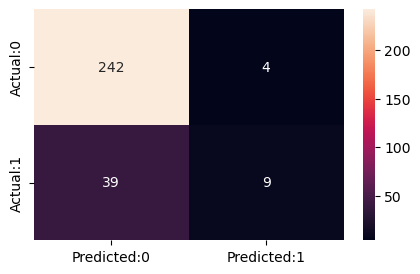

In [46]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

In [47]:
importances = RF.feature_importances_

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances, 'Percentage': [round(val,2) for val in ((importances*100)/sum(importances))]})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance.head()

,Feature,Importance,Percentage
0,Age,0.060681,6.07
11,MonthlyIncome,0.057555,5.76
7,HourlyRate,0.055769,5.58
2,DistanceFromHome,0.054685,5.47
14,OverTime,0.054238,5.42


<Axes: ylabel='Feature'>

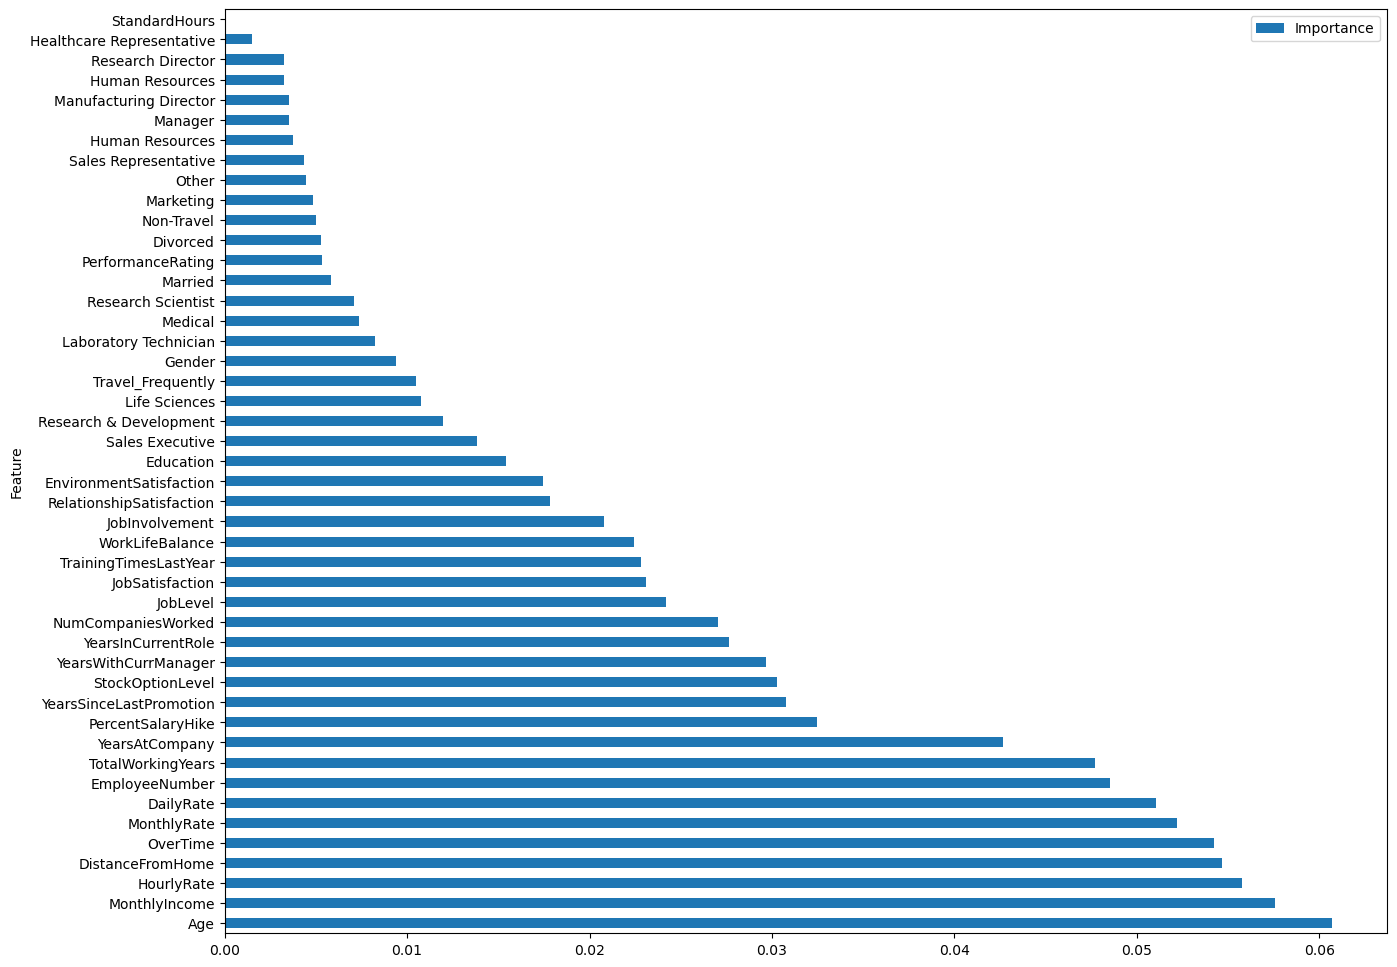

In [48]:
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(15,12))

## `Conclusion`

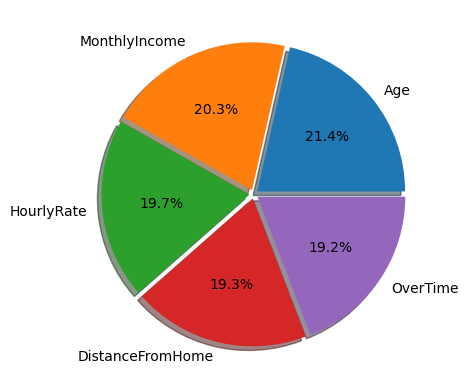

In [49]:
plt.pie(x='Importance', data=feature_importance.iloc[:5,:],autopct='%.1f%%',
        labels='Feature',explode = [0.03 for i in range(5)], shadow = True)
plt.show()

_So, major factors of IBM employee attrition were Age, MonthlyIncome, HourlyRate, DistanceFromHome, OverTime._

## `Prediction`

In [50]:
def gen(g):
   return 1 if (g.lower()=='male' or g.lower()[0]=='m') else 0

def overtime(o):
   return 1 if (o.lower()=='yes' or o.lower()[0]=='y') else 0

def business_travel(b):
   if b.lower()=='Travel_Rarely'.lower():
      return [0, 0]
   elif b.lower()=='Travel_Frequently'.lower():
      return [0, 1]
   else:
      return [1,0]
   
def department(d):
   if d.lower()=='Human Resources'.lower():
      return [1,0]
   elif d.lower()=='Research & Development'.lower():
      return [0,1]
   else:
      return [0,0]
   
def education_field(e):
    if e.lower()=='Human Resources'.lower():
        return [1,0,0,0,0]
    elif e.lower()=='Life Sciences'.lower():
        return [0,1,0,0,0]
    elif e.lower()=='Marketing'.lower():
        return [0,0,1,0,0]
    elif e.lower()=='Medical'.lower():
        return [0,0,0,1,0]
    elif e.lower()=='Other'.lower():
        return [0,0,0,0,1]
    else:
        return [0,0,0,0,0]
     
def jobrole(j):
    if j.lower()=='Healthcare Representative'.lower():
        return [1,0,0,0,0,0,0,0]
    elif j.lower()=='Laboratory Technician'.lower():
        return [0,1,0,0,0,0,0,0]
    elif j.lower()=='Manager'.lower():
        return [0,0,1,0,0,0,0,0]
    elif j.lower()=='Manufacturing Director'.lower():
        return [0,0,0,1,0,0,0,0]
    elif j.lower()=='Research Director'.lower():
        return [0,0,0,0,1,0,0,0]
    elif j.lower()=='Research Scientist'.lower():
        return [0,0,0,0,0,1,0,0]
    elif j.lower()=='Sales Executive'.lower():
        return [0,0,0,0,0,0,1,0]
    elif j.lower()=='Sales Representative'.lower():
        return [0,0,0,0,0,0,0,1]
    else:
        return [0,0,0,0,0,0,0,0]
    
def marital_status(m):
    if m.lower()=='Divorced'.lower():
        return [1,0]
    elif m.lower()=='Married'.lower():
        return [0,1]
    else:
        return [0,0]
      
def predict(ip):
    data = []
    data.append(ip[0])
    data.append(ip[2])
    data.extend(ip[4:6] + ip[8:10])
    data.append(gen(ip[10]))
    data.extend(ip[11:14])
    data.append(ip[15])
    data.extend(ip[17:20])
    data.append(overtime(ip[21]))
    data.extend(ip[22:] + business_travel(ip[1]) + department(ip[3])+  education_field(ip[6]) + jobrole(ip[14]) + marital_status(ip[16]))
    
    data = scaler.transform([data])
    result = RF.predict(data)[0]
    
    return "Yes, the employee will attrite from the company." if result==1 else "No, the employee will not attrite from the company."

In [51]:
predict([30, 'Travel_Rarely', 288, 'Research & Development', 2, 3,
       'Life Sciences', 1, 117, 3, 'Male', 99, 2, 2,
       'Healthcare Representative', 4, 'Married', 4152, 15830, 1, 'Y',
       'No', 19, 3, 1, 80, 3, 11, 3, 3, 11, 10, 10, 8])

'No, the employee will not attrite from the company.'